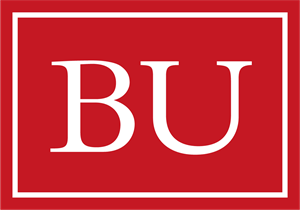

# **Assignment - 2**

# CS677 A3 Data Science with Python (Fall 2024)

##### Submitted by: Aishwarya Malhotra (U17161095)

### **Part - 1 Periodic Table & Stocks**

##### **Solution - 1**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("periodic_table_with_atomic_weights.csv")

In [4]:
tn = pd.read_csv("ticker_names.csv", encoding='latin-1')

In [5]:
# Looking at the dataframe
df.head()

,number,name,symbol,atomic_number,period,element_category,atomic_weight,phase
0,1,Hydrogen,H,1,1,diatomic nonmetal,1.008000,gas
1,2,Helium,He,2,1,noble gas,4.002602,gas
2,3,Lithium,Li,3,2,alkali metal,6.940000,solid
3,4,Beryllium,Be,4,2,alkaline earth metal,9.012183,solid
4,5,Boron,B,5,2,metalloid,10.810000,solid


In [6]:
# Looking at the dataframe
tn.head()

,Company,Symbol
0,Agilent Technologies Inc.,A
1,Alcoa Corporation,AA
2,AXS First Priority CLO Bond ETF,AAA
3,Goldman Sachs Physical Gold ETF Shares,AAAU
4,ATA Creativity Global American Depositary Shares,AACG


##### **Solution - 2**

In [7]:
df['phase'].unique()

array(['gas', 'solid', 'liquid', nan, 'solid presumably',
       'solid (predicted)', 'gas (predicted)'], dtype=object)

In [8]:
df["numeric_Phase "] = df["phase"].fillna("unknown").map({"gas":1, 'gas (predicted)':3, "liquid":2, "solid":3, 'solid presumably':3,  'solid (predicted)':3, "unknown":4})

In [9]:
df.head()

,number,name,symbol,atomic_number,period,element_category,atomic_weight,phase,numeric_Phase
0,1,Hydrogen,H,1,1,diatomic nonmetal,1.008000,gas,1
1,2,Helium,He,2,1,noble gas,4.002602,gas,1
2,3,Lithium,Li,3,2,alkali metal,6.940000,solid,3
3,4,Beryllium,Be,4,2,alkaline earth metal,9.012183,solid,3
4,5,Boron,B,5,2,metalloid,10.810000,solid,3


> **💡Interpretation of Result💡-**
>
> Using `unique` function we look at the different type of phases available in the dataset. And then we `map` the dataset accordingly.

##### **Solution - 3**

In [10]:
# Compute atomic weight
df['sqrt_atomic_weight'] = df['atomic_weight'].apply(np.sqrt)
df.head()

,number,name,symbol,atomic_number,period,element_category,atomic_weight,phase,numeric_Phase,sqrt_atomic_weight
0,1,Hydrogen,H,1,1,diatomic nonmetal,1.008000,gas,1,1.003992
1,2,Helium,He,2,1,noble gas,4.002602,gas,1,2.000650
2,3,Lithium,Li,3,2,alkali metal,6.940000,solid,3,2.634388
3,4,Beryllium,Be,4,2,alkaline earth metal,9.012183,solid,3,3.002030
4,5,Boron,B,5,2,metalloid,10.810000,solid,3,3.287856


> **💡Interpretation of Result💡-**
>
> The `apply` method is used to apply a function - `np.sqrt` (claculates sq root) to each element of the atomic weight.

##### **Solution - 4**

In [11]:
df1 = df.groupby('element_category').agg(
    count =('name', 'size'),
    min =('atomic_weight', 'mean'),
    max =('atomic_weight', 'max'),
    mean =('atomic_weight', 'mean'),
    std =('atomic_weight', 'std')
)

df1

,count,min,max,mean,std
element_category,,,,,
actinide,13,245.854041,259.000000,245.854041,9.456615
actinide sometimes considered a transition metal,2,246.500000,266.000000,246.500000,27.577164
alkali metal,6,85.066894,223.000000,85.066894,81.712572
alkaline earth metal,5,77.403317,226.000000,77.403317,88.140943
alkaline earth metals,1,137.327700,137.327700,137.327700,NaN
diatomic nonmetal,7,41.752982,126.904473,41.752982,45.381780
lanthanide,13,155.803044,173.045100,155.803044,11.193833
lanthanide sometimes considered a transition metal,2,156.936144,174.966810,156.936144,25.499213
metalloid,6,72.635083,127.603000,72.635083,47.427878


##### **Solution - 5**

In [12]:
print(tn.columns)
print(df.columns)

Index([' Company', ' Symbol'], dtype='object')
Index(['number', 'name', 'symbol', 'atomic_number', 'period',
       'element_category', 'atomic_weight', 'phase', 'numeric_Phase ',
       'sqrt_atomic_weight'],
      dtype='object')


In [13]:
# Join dataset tn & df
tn.set_index(' Symbol', inplace=True)
df.set_index('symbol', inplace=True)

joined_df = df.join(tn, how='inner')
joined_df.reset_index(inplace=True)
joined_df.head()

,index,number,name,atomic_number,period,element_category,atomic_weight,phase,numeric_Phase,sqrt_atomic_weight,Company
0,H,1,Hydrogen,1,1,diatomic nonmetal,1.008000,gas,1,1.003992,Hyatt Hotels Corporation
1,B,5,Boron,5,2,metalloid,10.810000,solid,3,3.287856,Barnes Group Inc.
2,C,6,Carbon,6,2,polyatomic nonmetal sometimes considered a met...,12.011000,solid,3,3.465689,Citigroup Inc.
3,O,8,Oxygen,8,2,diatomic nonmetal,15.999000,gas,1,3.999875,Realty Income Corporation
4,F,9,Fluorine,9,2,diatomic nonmetal,18.998403,gas,1,4.358716,Ford Motor Company


> **💡Interpretation of Code💡-**
>
>Upon encounting an error while joining both the dataset, I used `print` function to inspect the columns of `tn` dataset. I discovered that there was a extra space before 'Symbol' coloumn name. I updated the code to account for this space, ensuring that the column names matched correctly for the join function.

##### **Solution - 6**

In [14]:
t_count = joined_df['name'].value_counts()
print(t_count)

name
Hydrogen     1
Boron        1
Carbon       1
Oxygen       1
Fluorine     1
Sulfur       1
Potassium    1
Vanadium     1
Tungsten     1
Uranium      1
Name: count, dtype: int64


In [15]:
category_counts = joined_df['element_category'].value_counts()
print(category_counts)

element_category
diatomic nonmetal                                       3
transition metal                                        2
metalloid                                               1
polyatomic nonmetal sometimes considered a metalloid    1
polyatomic nonmetal                                     1
alkali metal                                            1
actinide                                                1
Name: count, dtype: int64


##### **Solution - 7**

In [16]:
phase_count = joined_df['phase'].value_counts()
print(phase_count)

phase
solid    7
gas      3
Name: count, dtype: int64


> **💡Interpretation of Code💡-**
>
> To determine how many stocks corresponds to each state, I counted the occurance of each state in the `phase` coloumn.
>
> There were no stocks in liquid state as the dataset doesn't contain the state. Solid phase contains 7 stocks and Gas contains 3 stocks.

##### **Solution - 8**

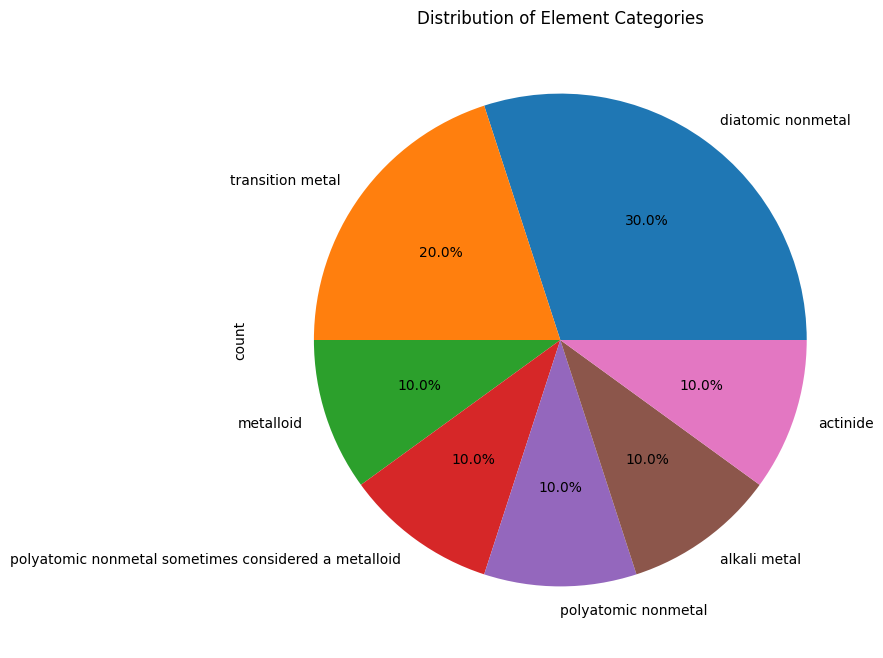

In [17]:
import matplotlib.pyplot as plt

category_counts.plot.pie(
    figsize=(8,8),
    autopct='%1.1f%%',
    title='Distribution of Element Categories'
)

plt.show()

> **💡Interpretations💡-**
>
>From the above pie chart we can observe that diatomic nonmetal category has the highest number of companies.

##### **Solution - 9**

Counts for each element category:
element_category
diatomic nonmetal                                       3
transition metal                                        2
metalloid                                               1
polyatomic nonmetal sometimes considered a metalloid    1
polyatomic nonmetal                                     1
alkali metal                                            1
actinide                                                1
Name: count, dtype: int64


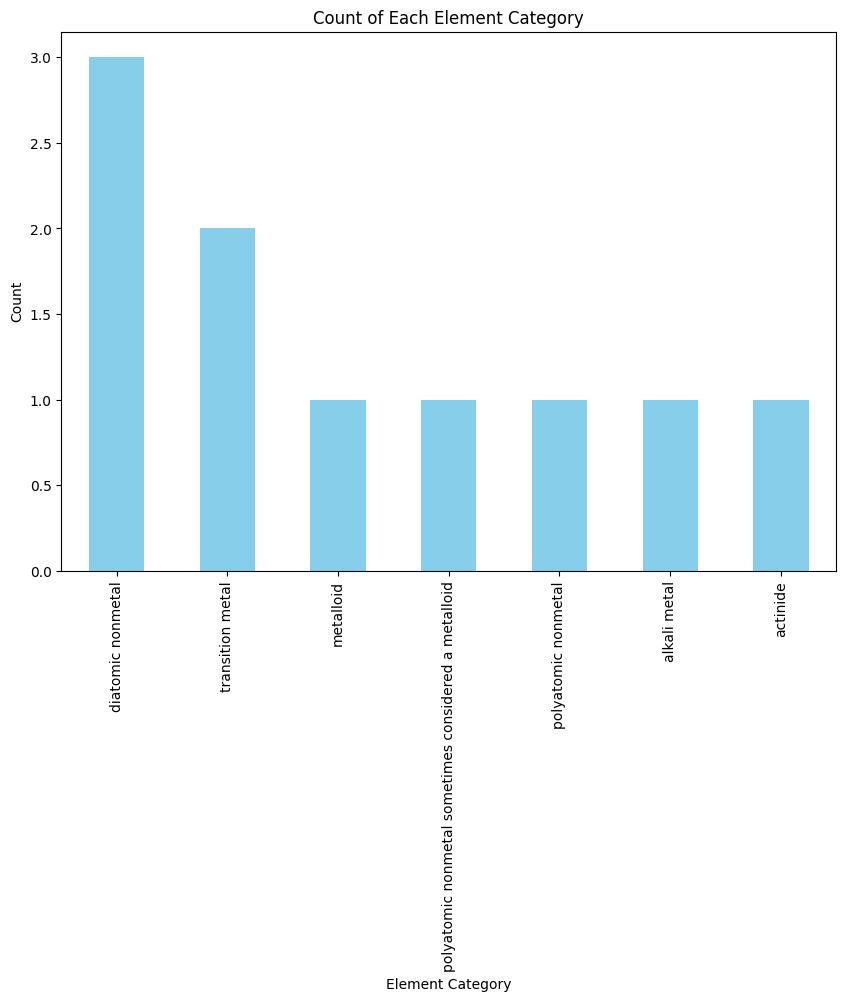

In [18]:
print("Counts for each element category:")
print(category_counts)

category_counts.plot.bar(
    figsize= (10,7),
    color='skyblue',
    title='Count of Each Element Category',
    xlabel='Element Category',
    ylabel='Count'
)
plt.show()

> **💡Interpretation of Graph💡-**
>
> From the above graph we can observe that diatomic nonmetal category has the highest number of companies.

##### **Solution - 10**

In [19]:
joined_df

,index,number,name,atomic_number,period,element_category,atomic_weight,phase,numeric_Phase,sqrt_atomic_weight,Company
0,H,1,Hydrogen,1,1,diatomic nonmetal,1.008000,gas,1,1.003992,Hyatt Hotels Corporation
1,B,5,Boron,5,2,metalloid,10.810000,solid,3,3.287856,Barnes Group Inc.
2,C,6,Carbon,6,2,polyatomic nonmetal sometimes considered a met...,12.011000,solid,3,3.465689,Citigroup Inc.
3,O,8,Oxygen,8,2,diatomic nonmetal,15.999000,gas,1,3.999875,Realty Income Corporation
4,F,9,Fluorine,9,2,diatomic nonmetal,18.998403,gas,1,4.358716,Ford Motor Company
5,S,16,Sulfur,16,3,polyatomic nonmetal,32.060000,solid,3,5.662155,"SentinelOne, Inc."
6,K,19,Potassium,19,4,alkali metal,39.098310,solid,3,6.252864,Kellanova
7,V,23,Vanadium,23,4,transition metal,50.941510,solid,3,7.137332,VISA Inc.
8,W,74,Tungsten,74,6,transition metal,183.841000,solid,3,13.558798,Wayfair Inc.
9,U,92,Uranium,92,7,actinide,238.028913,solid,3,15.428186,Unity Software Inc.


In [20]:
print(joined_df.columns)

Index(['index', 'number', 'name', 'atomic_number', 'period',
       'element_category', 'atomic_weight', 'phase', 'numeric_Phase ',
       'sqrt_atomic_weight', ' Company'],
      dtype='object')


In [21]:
def impact_metric(row):
  if row['atomic_number'] > 0 and row['atomic_weight'] > 0:
    return np.log((row['atomic_weight'] * row['numeric_Phase ']) / row['atomic_number'])
  else:
    return np.nan

joined_df['impact_metric'] = joined_df.apply(impact_metric, axis=1)
joined_df.sort_values(by='impact_metric', ascending=False, inplace=True)
joined_df

,index,number,name,atomic_number,period,element_category,atomic_weight,phase,numeric_Phase,sqrt_atomic_weight,Company,impact_metric
9,U,92,Uranium,92,7,actinide,238.028913,solid,3,15.428186,Unity Software Inc.,2.049216
8,W,74,Tungsten,74,6,transition metal,183.841000,solid,3,13.558798,Wayfair Inc.,2.008618
7,V,23,Vanadium,23,4,transition metal,50.941510,solid,3,7.137332,VISA Inc.,1.893796
1,B,5,Boron,5,2,metalloid,10.810000,solid,3,3.287856,Barnes Group Inc.,1.869646
6,K,19,Potassium,19,4,alkali metal,39.098310,solid,3,6.252864,Kellanova,1.820253
5,S,16,Sulfur,16,3,polyatomic nonmetal,32.060000,solid,3,5.662155,"SentinelOne, Inc.",1.793633
2,C,6,Carbon,6,2,polyatomic nonmetal sometimes considered a met...,12.011000,solid,3,3.465689,Citigroup Inc.,1.792676
4,F,9,Fluorine,9,2,diatomic nonmetal,18.998403,gas,1,4.358716,Ford Motor Company,0.747130
3,O,8,Oxygen,8,2,diatomic nonmetal,15.999000,gas,1,3.999875,Realty Income Corporation,0.693085
0,H,1,Hydrogen,1,1,diatomic nonmetal,1.008000,gas,1,1.003992,Hyatt Hotels Corporation,0.007968


> **💡Interpretation of Results💡-**
>
> The `impact_metric` calculated is based on the logarithmic relationship between the atomic weight, numeric phase, and atomic number of each element. The higher the atomic weight and numeric phase relatice to the atomic number, higher the impact.
>
>Elements like Uranium, Tungsten & Vanadium have higher impact reflecting their physical significance and perhaps mirroring the company's relative market influence or stability.

### **Part - 2 Week Labling**

Attached to the submission is the excel file.

**Strategy:** Rows are colored green if the graph (adj closing price) goes up twice in continuity in a week otherwise it is colored red of the year 2022 & 2023.